<h1>PREDICTION OF PATIENT STATUS</h1>

<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools

%matplotlib inline

In [2]:
data = pd.read_csv('Patient.csv')

In [3]:
data.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,Male,0,95,chest pain or pressure,headache,fever,Moderate,Covid
1,31/01/20,6:00 PM,Kerala,1,Male,0,99,difficulty breathing or shortness of breath,"a rash on skin, or discolouration of fingers o...",tiredness,Mild,Covid
2,1/2/2020,6:00 PM,Kerala,2,Male,0,91,difficulty breathing or shortness of breath,aches and pains,fever,Moderate,Covid
3,2/2/2020,6:00 PM,Kerala,3,Female,0,76,loss of speech or movement,sore throat,dry cough,Moderate,Covid
4,3/2/2020,6:00 PM,Kerala,3,Female,0,17,loss of speech or movement,loss of taste or smell,tiredness,Severe,Covid


In [4]:
data.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'Gender ', 'ConfirmedForeignNational', 'Age ', 'Serious symptoms',
       'Less common symptoms', 'Most common symptoms', 'Severity',
       'Patient_Status '],
      dtype='object')

In [5]:
catagorical_columns = ['Serious symptoms', 'Less common symptoms', 'Most common symptoms', 'Severity', 'Patient_Status ', 'Gender ']
for column in catagorical_columns:
    u = data[column].unique()
    data[column].replace(to_replace = u, value = range(0, len(u)), inplace = True)

In [6]:
data.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,0,0,95,0,0,0,0,0
1,31/01/20,6:00 PM,Kerala,1,0,0,99,1,1,1,1,0
2,1/2/2020,6:00 PM,Kerala,2,0,0,91,1,2,0,0,0
3,2/2/2020,6:00 PM,Kerala,3,1,0,76,2,3,2,0,0
4,3/2/2020,6:00 PM,Kerala,3,1,0,17,2,4,1,2,0


In [7]:
data.drop(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], inplace = True, axis = 1)

In [8]:
data.head()

,Gender,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,0,95,0,0,0,0,0
1,0,99,1,1,1,1,0
2,0,91,1,2,0,0,0
3,1,76,2,3,2,0,0
4,1,17,2,4,1,2,0


In [9]:
X = data.loc[ : , 'Gender ' : 'Severity']
X.head()

,Gender,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity
0,0,95,0,0,0,0
1,0,99,1,1,1,1
2,0,91,1,2,0,0
3,1,76,2,3,2,0
4,1,17,2,4,1,2


In [10]:
Y = data.loc[ : , ['Patient_Status ']]
Y.head()

,Patient_Status
0,0
1,0
2,0
3,0
4,0


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2,random_state=4)
print('Train set:', X_train.shape,  Y_train.shape)
print('Test set:', X_test.shape,  Y_test.shape)
print('Whole set:', X.shape, Y.shape)

Train set: (2508, 6) (2508, 1)
Test set: (627, 6) (627, 1)
Whole set: (3135, 6) (3135, 1)


In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(f'Accuracy of K-NN classifier on training set: {knn.score(X_train, Y_train):.2f}')

C:\Users\Manav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of K-NN classifier on training set: 0.68


In [13]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Greys):
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max()/ 2)+70
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[142   0]
 [  0   0]]


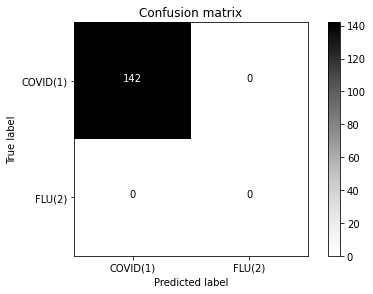

In [14]:
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,2])
print("Confusion matrix")

print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COVID(1)','FLU(2)'],title='Confusion matrix')

<hr>

<h1>SEVERITY GAUGING CLASSIFIER</h1>

<hr>

In [15]:
X1 = data.loc[ : , 'Gender ' : 'Most common symptoms']
X1.head()

,Gender,Age,Serious symptoms,Less common symptoms,Most common symptoms
0,0,95,0,0,0
1,0,99,1,1,1
2,0,91,1,2,0
3,1,76,2,3,2
4,1,17,2,4,1


In [16]:
Y1 = data.loc[ : , ['Severity']]
Y1.head()

,Severity
0,0
1,1
2,0
3,0
4,2


In [17]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size=0.2,random_state=4)
print('Train set:', X1_train.shape,  Y1_train.shape)
print('Test set:', X1_test.shape,  Y1_test.shape)
print('Whole set:', X1.shape, Y1.shape)

Train set: (2508, 5) (2508, 1)
Test set: (627, 5) (627, 1)
Whole set: (3135, 5) (3135, 1)


In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y1_pred = knn.predict(X_test)
print(f'Accuracy of K-NN classifier on training set: {knn.score(X_train, Y_train):.2f}')

C:\Users\Manav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of K-NN classifier on training set: 0.68


Confusion matrix
[[90  0  0]
 [92  0  0]
 [ 0  0  0]]


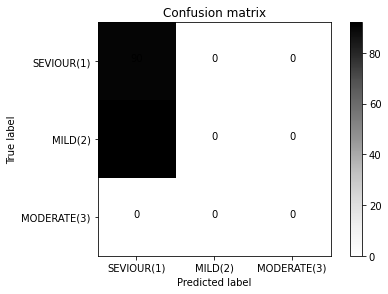

In [19]:
cnf_matrix = confusion_matrix(Y1_test, Y1_pred, labels=[1,2,3])
print("Confusion matrix")
print(cnf_matrix)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVIOUR(1)','MILD(2)','MODERATE(3)'],title='Confusion matrix')

<hr>